In [1]:
# from google.colab import drive
# from google.colab import userdata

# drive.mount('/content/drive')

# %cd /content/drive/MyDrive/Coding/Kaggle/kaggle-houses/

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm


# Basic Model

In [3]:
def set_dotenv():
    import os
    from dotenv import load_dotenv

    load_dotenv(dotenv_path='variables.env')

    kaggle_username = os.getenv("KAGGLE_USERNAME")
    kaggle_key = os.getenv("KAGGLE_KEY")

    os.environ["KAGGLE_USERNAME"] = kaggle_username
    os.environ["KAGGLE_KEY"] = kaggle_key

def kaggle_download(dataset, output_path='./raw_data/'):
    import kaggle
    import zipfile

    kaggle.api.competition_download_files('house-prices-advanced-regression-techniques', path=output_path)

    with zipfile.ZipFile(f'{output_path}house-prices-advanced-regression-techniques.zip', 'r') as zip_ref:
        zip_ref.extractall(output_path)

def data_target(df, target):
    X = df[list(set(df.columns) - set(target))].drop(columns=[target])
    y = df[target]

    return X, y

def EDA_feat(col):
    plt.subplots(1,3, figsize=(24,6))
    plt.subplot(1,3,1)
    sns.boxplot(col)
    plt.ylabel(f'{col.name}')


    plt.subplot(1,3,2)
    sns.histplot(col, stat='density')
    plt.xlabel(f'{col.name}')

    plt.subplot(1,3,3)
    sns.kdeplot(col, label=col.name)
    mean, std_dev = np.mean(col), np.std(col)
    x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 1000)
    pdf = norm.pdf(x, mean, std_dev)
    # plt.plot(x, pdf, 'b-', label='Gaussian fit')
    sns.lineplot(x=x, y=pdf, color='b', alpha=0.2, label='Gaussian Distribution')


In [4]:
# dataset_name = 'house-prices-advanced-regression-techniques'

# kaggle_download(dataset_name)

In [5]:
df = pd.read_csv('./raw_data/train.csv') # Local

# df = pd.read_csv('./data/train.csv') # Google collab

In [6]:
X, y = data_target(df, 'SalePrice')

In [7]:
print(X.columns)

Index(['BsmtQual', 'BldgType', 'GarageCond', 'Condition1', 'BsmtCond',
       'GarageArea', 'Exterior1st', 'YrSold', 'Condition2', 'BsmtFullBath',
       'RoofStyle', 'HouseStyle', 'LowQualFinSF', 'EnclosedPorch', 'LandSlope',
       'BsmtUnfSF', '2ndFlrSF', 'Alley', 'Exterior2nd', 'MasVnrType',
       'PavedDrive', 'ScreenPorch', 'BsmtFinSF2', 'Heating', 'GarageCars',
       'BsmtFinSF1', 'BsmtFinType2', 'MSSubClass', 'OpenPorchSF',
       'BsmtFinType1', 'GarageType', 'Fireplaces', 'ExterQual', 'GrLivArea',
       'TotalBsmtSF', 'SaleCondition', 'MasVnrArea', 'Neighborhood',
       'Foundation', 'RoofMatl', 'YearRemodAdd', 'Electrical', 'GarageFinish',
       'Street', 'MiscVal', 'SaleType', 'WoodDeckSF', 'GarageQual',
       'HeatingQC', 'LotConfig', 'KitchenAbvGr', 'KitchenQual', 'Utilities',
       'PoolQC', 'LotArea', 'Functional', 'FireplaceQu', 'BsmtExposure',
       'PoolArea', 'HalfBath', 'CentralAir', 'LandContour', 'FullBath',
       'OverallQual', 'LotShape', 'BedroomAbvGr

In [8]:
selected_cols = ['GrLivArea', 'OverallCond', 'OverallQual', 'BedroomAbvGr', 'KitchenAbvGr', 'YearBuilt']
X = X[selected_cols]

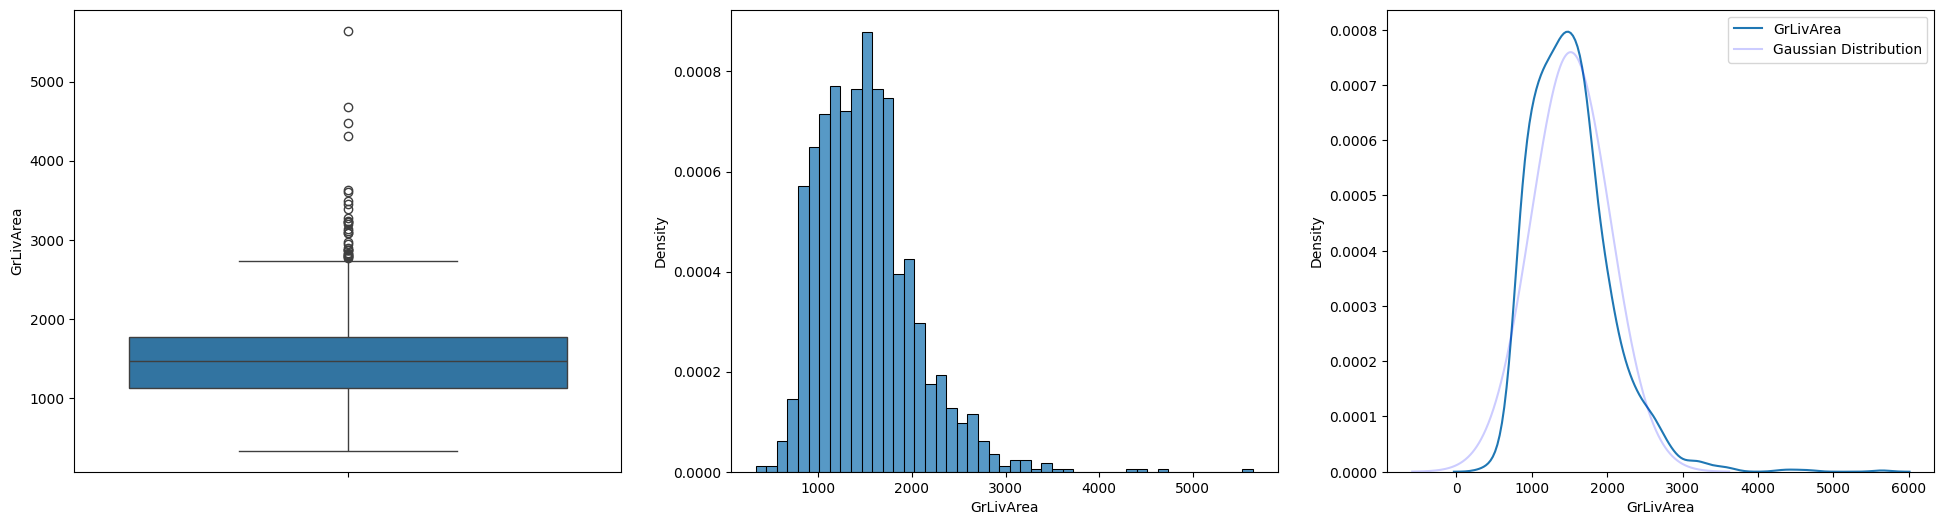

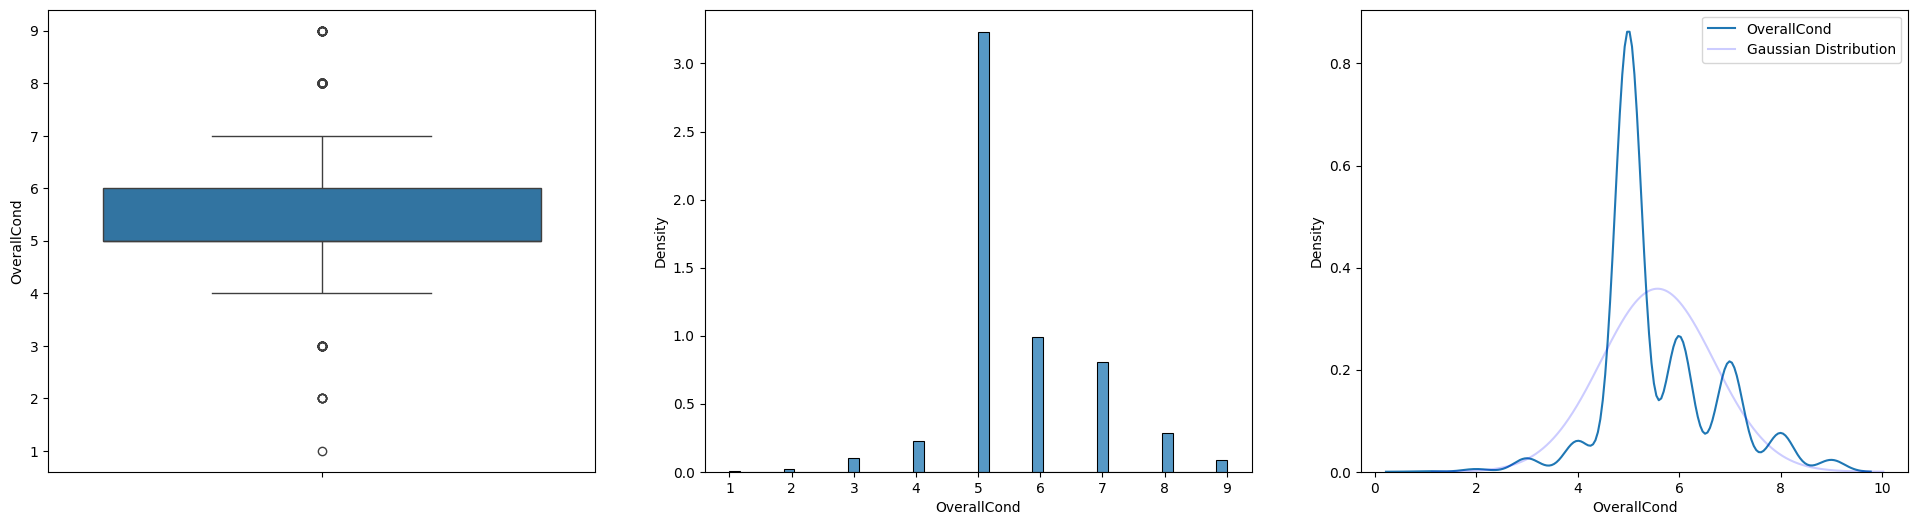

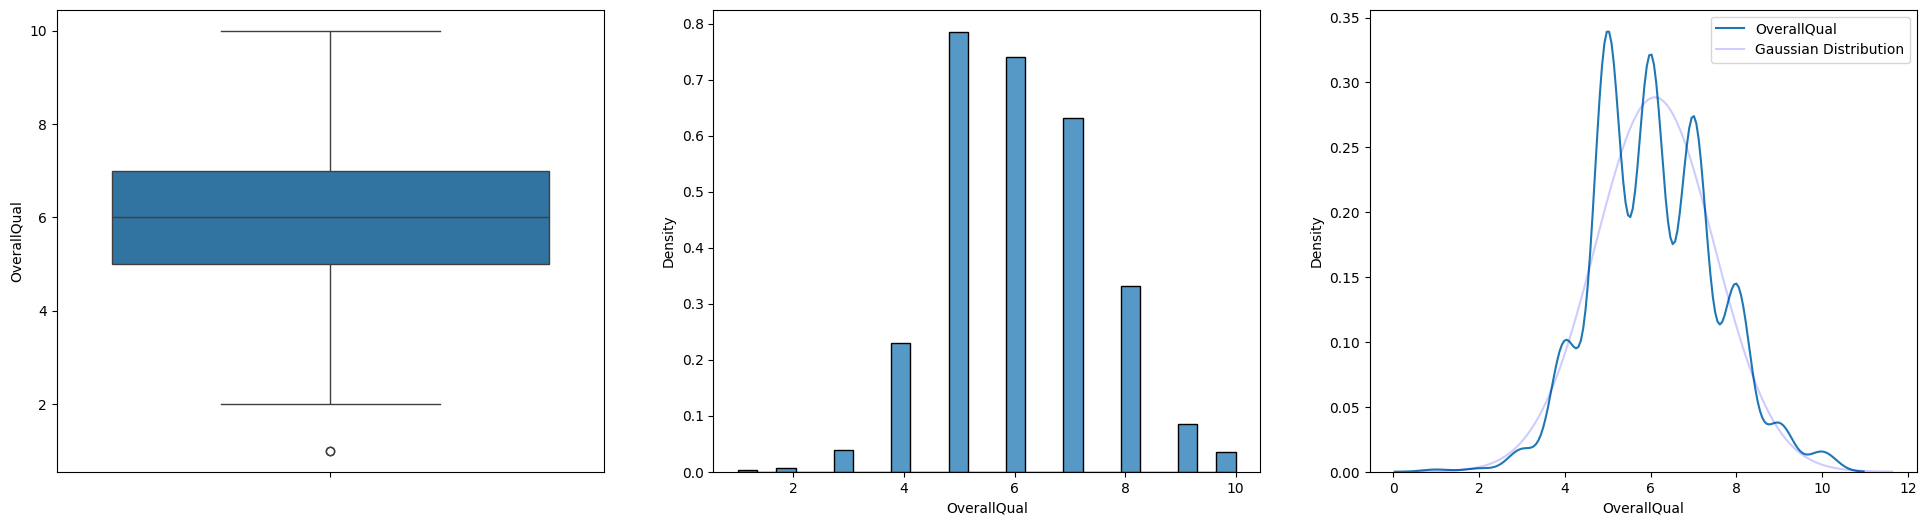

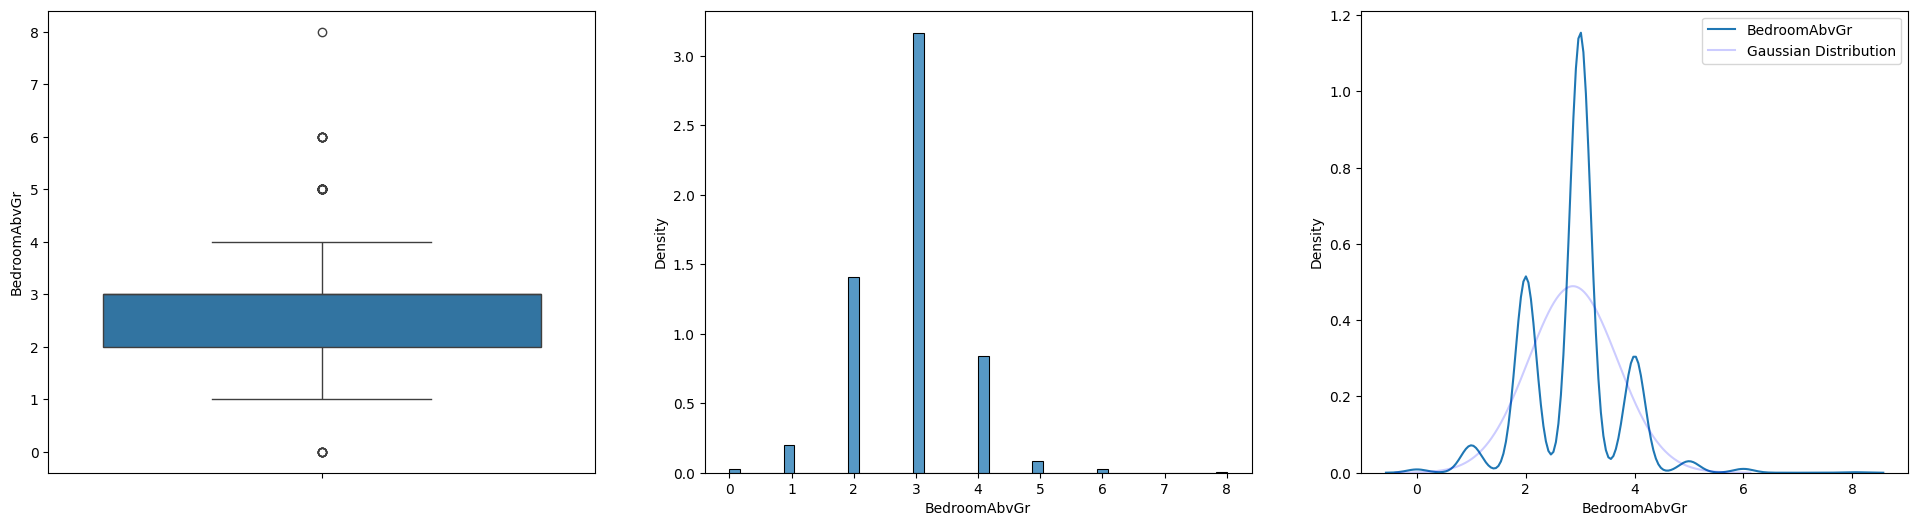

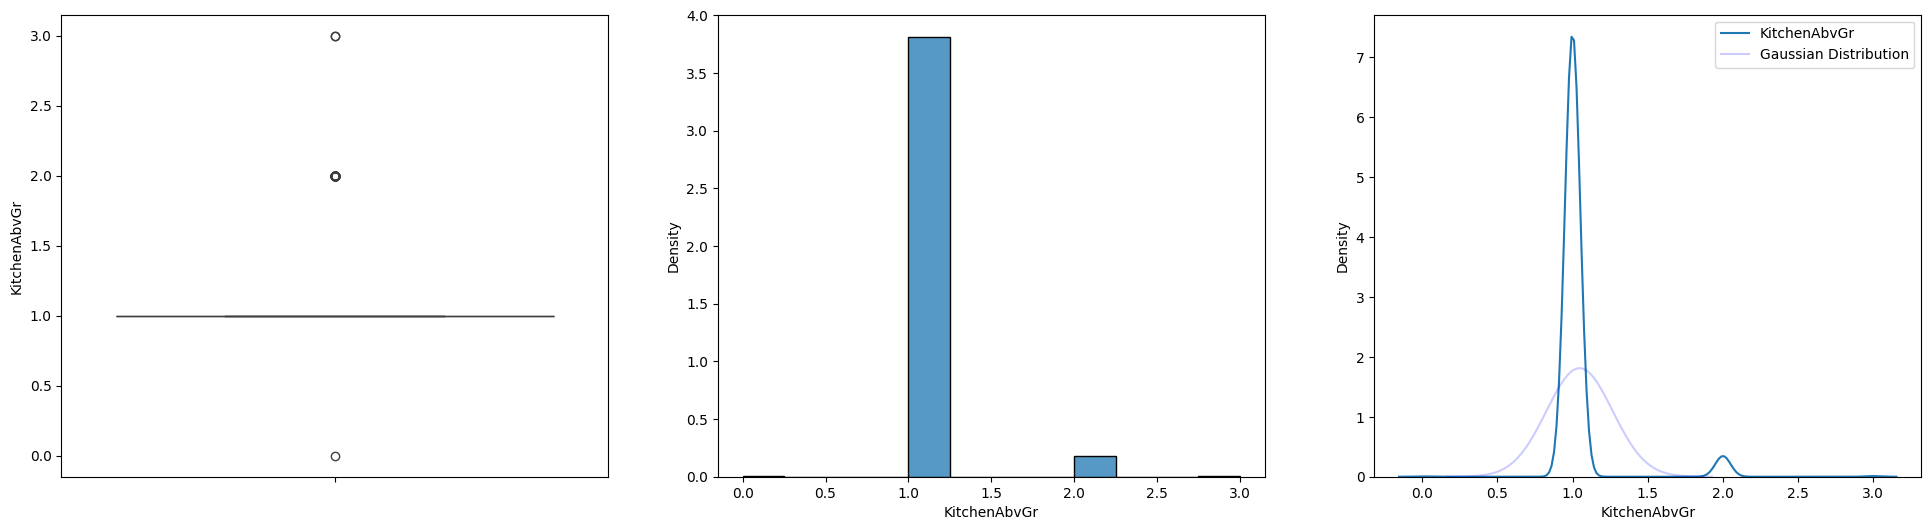

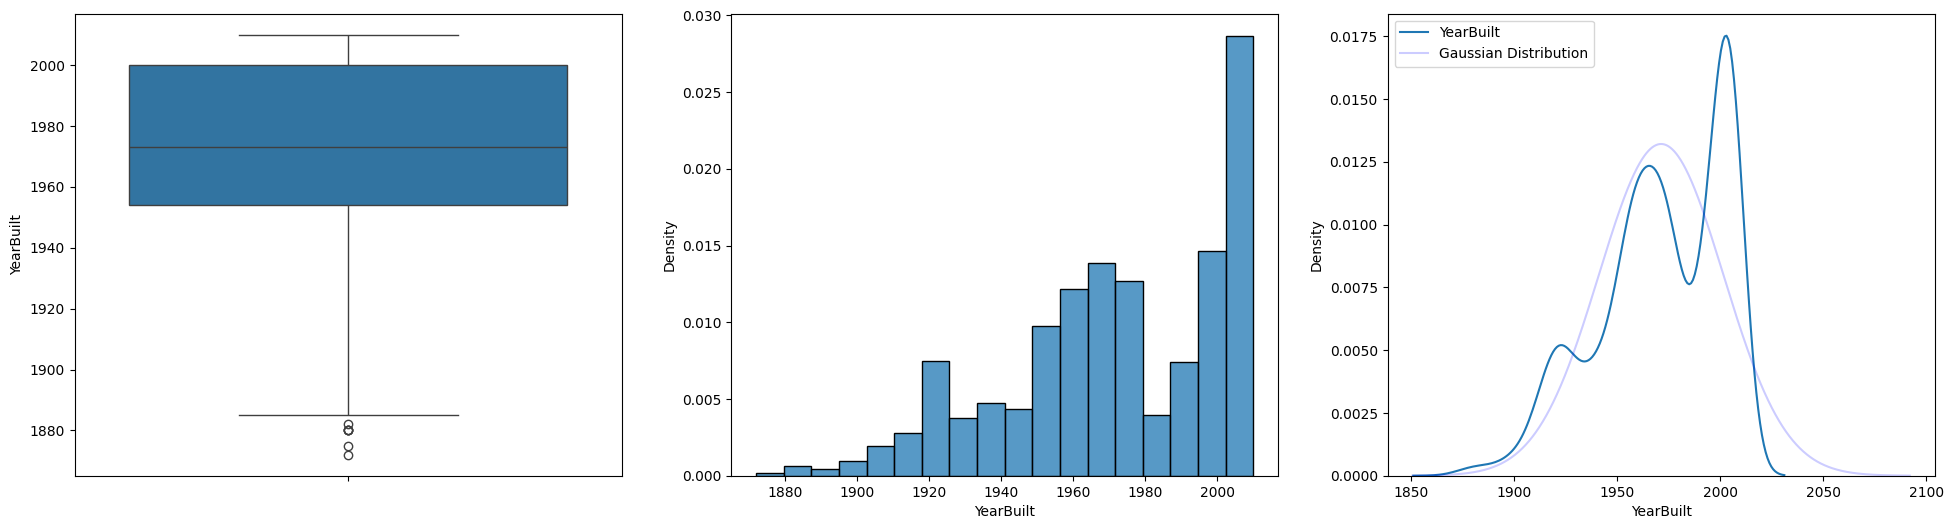

In [9]:
for col in X.columns:
    EDA_feat(X[col])

In [10]:
from sklearn.model_selection import train_test_split, cross_validate

X['DecadeBuilt'] = pd.cut(X['YearBuilt'],bins=np.arange(1850, 2011, 10))

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

As scaler, we could think in using a log transformation or boxcox to address the skewness of the distributions but for now, since this is a base model, let's do only the Robust Scaler

In [13]:
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler

scaling_col = list(set(X.columns) - {'YearBuilt', 'DecadeBuilt'})

scaler = RobustScaler()
X_scaled = X_train
X_scaled[scaling_col] = scaler.fit_transform(X_train[scaling_col]) 

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

model = LinearRegression()
cv_results = cross_validate(estimator=model, X=X_scaled[scaling_col], y=y_train, cv=5)

In [23]:
cv_results['test_score'].mean()

0.720363967880106

# Deep learning model

In [17]:
# df = pd.read_csv('./raw_data/train.csv') # Local
# # df = pd.read_csv('./data/train.csv') # Google collab
# X, y = data_target(df, 'SalePrice')
# selected_cols = ['GrLivArea', 'OverallCond', 'OverallQual', 'BedroomAbvGr', 'KitchenAbvGr', 'YearBuilt']
# X = X[selected_cols]
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
# scaling_col = list(set(X_train.columns) - {'YearBuilt', 'DecadeBuilt'})
# scaler_dict, X_train = batch_scaling(X_train[scaling_col], 'RS')

C:\Users\Roberto\AppData\Local\Temp\ipykernel_36060\4050067583.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.5  0.  -0.5 ...  0.  -0.5  0. ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, col] = scaler_dict[key].transform(df[[col]])
C:\Users\Roberto\AppData\Local\Temp\ipykernel_36060\4050067583.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.80090158 -0.52967693 -0.8677686  ...  0.0353118  -0.2742299
  0.14650639]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, col] = scaler_dict[key].transform(df[[col]])


In [18]:
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras.regularizers import l2

In [19]:
# optimizer = Adam(learning_rate=0.005)
# callback = EarlyStopping(monitor='val_loss', patience=10)

# n_epochs = 500
# batch_size = 4

In [20]:
# input_layer = Input(shape=(X_train.shape[1],))
# dense_layer_1 = Dense(64, activation='relu', kernel_regularizer=l2(0.01), kernel_initializer='normal')(input_layer)
# dense_layer_2 = Dense(32, activation='relu', kernel_regularizer=l2(0.01), kernel_initializer='normal')(dense_layer_1)
# dense_layer_3 = Dense(16, activation='relu', kernel_regularizer=l2(0.01), kernel_initializer='normal')(dense_layer_2)
# output_layer = Dense(1, activation='linear')(dense_layer_3)

# model = Model(inputs=input_layer, outputs=output_layer)

In [21]:
# model.compile(optimizer=optimizer, loss='msle', metrics=['msle'])

In [22]:
# history = model.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size, validation_split=0.2, callbacks=[callback])

Epoch 1/500
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 80.2003 - msle: 79.0782 - val_loss: 21.4914 - val_msle: 16.9867
Epoch 2/500
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step - loss: 19.2353 - msle: 14.4276 - val_loss: 14.7594 - val_msle: 9.6666
Epoch 3/500
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 854us/step - loss: 13.9555 - msle: 8.8787 - val_loss: 11.9532 - val_msle: 6.9635
Epoch 4/500
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step - loss: 11.6223 - msle: 6.6866 - val_loss: 10.2710 - val_msle: 5.5698
Epoch 5/500
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 891us/step - loss: 10.0680 - msle: 5.4097 - val_loss: 9.0748 - val_msle: 4.6309
Epoch 6/500
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step - loss: 8.8003 - msle: 4.4326 - val_loss: 8.1441 - val_msle: 3.9724
Epoch 7/500
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - loss: 7.9612 - msle: 3.8759 - val_loss: 7.3917 - val_msle: 3.5238
Epoch 8/500
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step - loss: 7.2857 - msle: 3.4611 - val_loss: 6.7648 - val_msle: 3.1439
Epoch 

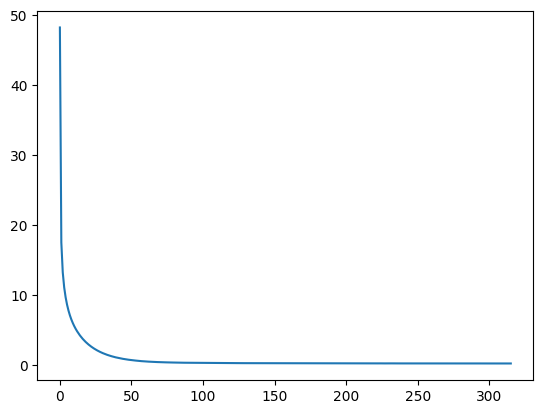

In [25]:
# plt.plot(history.history['loss'])

In [26]:
# results = model.evaluate(X_test.drop(columns=['YearBuilt']), y_test)
# print(f"RMLSE achieved after {n_epochs} epochs = {round(results[1]**0.5,3)}")


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1579 - msle: 0.1330
RMLSE achieved after 500 epochs = 0.377
